In [2]:
import math
import pickle as pkl
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
#This will ignore all DeprecationWarning warnings in your code.

In [3]:
def WpPlusB(w, p, b):
    multiplicacion = 0
    for x in w:
        for y in p:
            multiplicacion += x * y
    return multiplicacion + b

In [4]:
def function_act(n):
    return (1 / (1 + (math.e ** -n)))

In [5]:
def normalize(data):
    data_norm = []
    for (x, y) in data:
        w = []
        for z in y:
            w.append(z / 255)
        data_norm.append((x, w))
    return data_norm

In [6]:
def actualizacion_pesos(w, p, tasa, e):
    wa = []
    for (x, y) in zip(w, p):
        wa.append((x + (e * tasa * y)))
    return wa

In [7]:
def entrenamiento(data, w, tasa, b, epocas = 1):
    for i in range(0, epocas):
        correctas = 0
        e = 0
        for (x, y) in data:
            n = WpPlusB(w, y, b)
            a = function_act(n)
            e = x - a
            if x == ((a > 0.5) * 1):
                correctas += 1
            else:
                w = actualizacion_pesos(w, y, tasa, e)
                b = b + e
        rendimiento = correctas / len(data)
        print("Rendimiento en epoca {}: {}".format((i + 1), rendimiento))

In [8]:
df = pd.read_csv("breast-cancer.csv")

In [9]:
#analisis de tipos datos
df.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
#desc de datos
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
#transformacion de datos
df["diagnosis"] = df["diagnosis"].astype("category")
print(df["diagnosis"].cat.categories)
df["diagnosis"] = df["diagnosis"].cat.codes
best_cols = df.corr()["diagnosis"].sort_values()[-5:].index
df = df[best_cols]

Index(['B', 'M'], dtype='object')


In [12]:
diagnosisnt = list(set(best_cols) - set(["diagnosis"]))

array([[<AxesSubplot: xlabel='concave points_worst', ylabel='concave points_worst'>,
        <AxesSubplot: xlabel='concave points_mean', ylabel='concave points_worst'>,
        <AxesSubplot: xlabel='radius_worst', ylabel='concave points_worst'>,
        <AxesSubplot: xlabel='perimeter_worst', ylabel='concave points_worst'>],
       [<AxesSubplot: xlabel='concave points_worst', ylabel='concave points_mean'>,
        <AxesSubplot: xlabel='concave points_mean', ylabel='concave points_mean'>,
        <AxesSubplot: xlabel='radius_worst', ylabel='concave points_mean'>,
        <AxesSubplot: xlabel='perimeter_worst', ylabel='concave points_mean'>],
       [<AxesSubplot: xlabel='concave points_worst', ylabel='radius_worst'>,
        <AxesSubplot: xlabel='concave points_mean', ylabel='radius_worst'>,
        <AxesSubplot: xlabel='radius_worst', ylabel='radius_worst'>,
        <AxesSubplot: xlabel='perimeter_worst', ylabel='radius_worst'>],
       [<AxesSubplot: xlabel='concave points_worst', yl

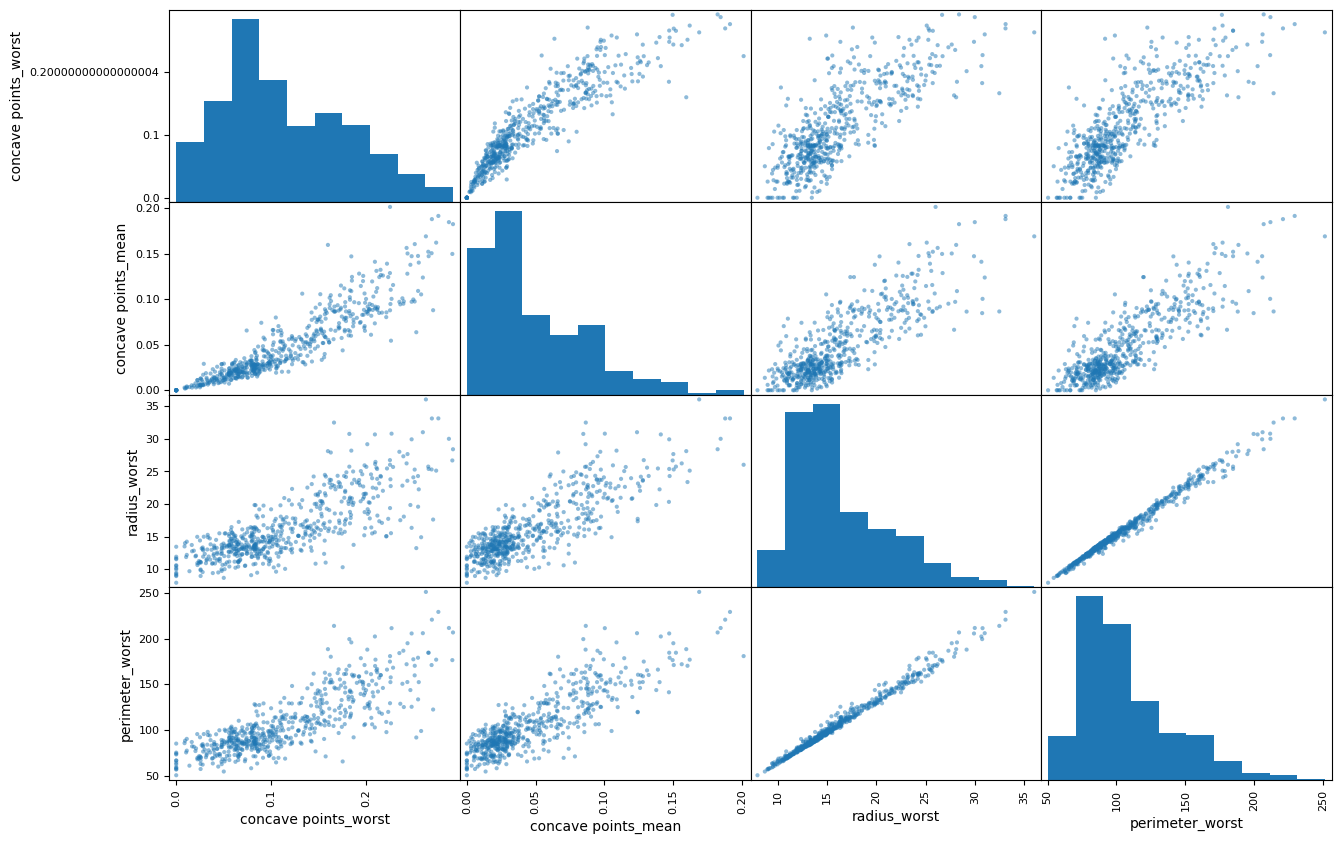

In [13]:
scatter_matrix(df[diagnosisnt], figsize= (15, 10))

In [14]:
#escalamiento de datos
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df[diagnosisnt])
df[diagnosisnt] = df_norm

## Separación de datos

In [15]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)
df_test = X_test.copy()
df_test["diagnosis"] = y_test.copy()
df_train = X_train.copy()
df_train["diagnosis"] = y_train.copy()

In [16]:
df["diagnosis"].unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int8>

In [17]:
def entrenamiento_test(data, w, tasa, b, epocas = 1):
    rendimientos = []
    for i in range(0, epocas):
        correctas = 0
        for x in data.to_dict("record"):
            p = [x[col] for col in diagnosisnt]
            n = WpPlusB(w, p, b)
            a = (function_act(n) > 0.5) * 1
            e = x["diagnosis"] - a
            correctas = (correctas + 1) if e == 0 else correctas
            w = actualizacion_pesos(w, p, tasa, e)
            b = b + e
        rendimiento = correctas / len(data)
        rendimientos.append(rendimiento)
    return w, b, rendimientos

In [18]:
def predicciones(w, p, b):
    predicciones = []
    for x in p.to_dict("record"):
        pa = [x[col] for col in diagnosisnt]
        n = WpPlusB(w, pa, b)
        a = (function_act(n) > 0.5) * 1
        predicciones.append(a)
    return predicciones

In [19]:
w = np.random.normal(size = (len(diagnosisnt)))
b = 1
# epocas = [20, 40, 60, 80, 100]
# tasas = [0.1, 0.2, 0.3, 0.4]
tasa = 0.5
epocas = 50
wa, ba, rendimientos = entrenamiento_test(df_train, w, tasa, b, epocas)
predicts = predicciones(wa, df_test, ba)
accuracy = accuracy_score(df_test["diagnosis"], predicts)
print(accuracy)
# plt.ylabel('Rendimiento')
# plt.xlabel('Epocas')
# plt.xticks(range(epocas))
# plt.ylim(0, 1)
# plt.plot(rendimientos)

0.9298245614035088


### Guardado del modelo entrenado

In [20]:
with open("hiperparametros.pkl", "wb+") as file:
    pkl.dump([wa, ba], file)

### Evaluación

In [21]:
confusion_m = confusion_matrix(df_test["diagnosis"], predicts)
print(confusion_m)

[[63  0]
 [ 8 43]]
